In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits

%matplotlib inline

In [2]:
data = pd.read_csv('modified_train_binaaz.csv')
#test = pd.read_csv('test_clear.csv')
train = data.sample(frac=0.7, random_state=3)
test = data.loc[~data.index.isin(train.index)]

/home/dzinski/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x1000 with 0 Axes>

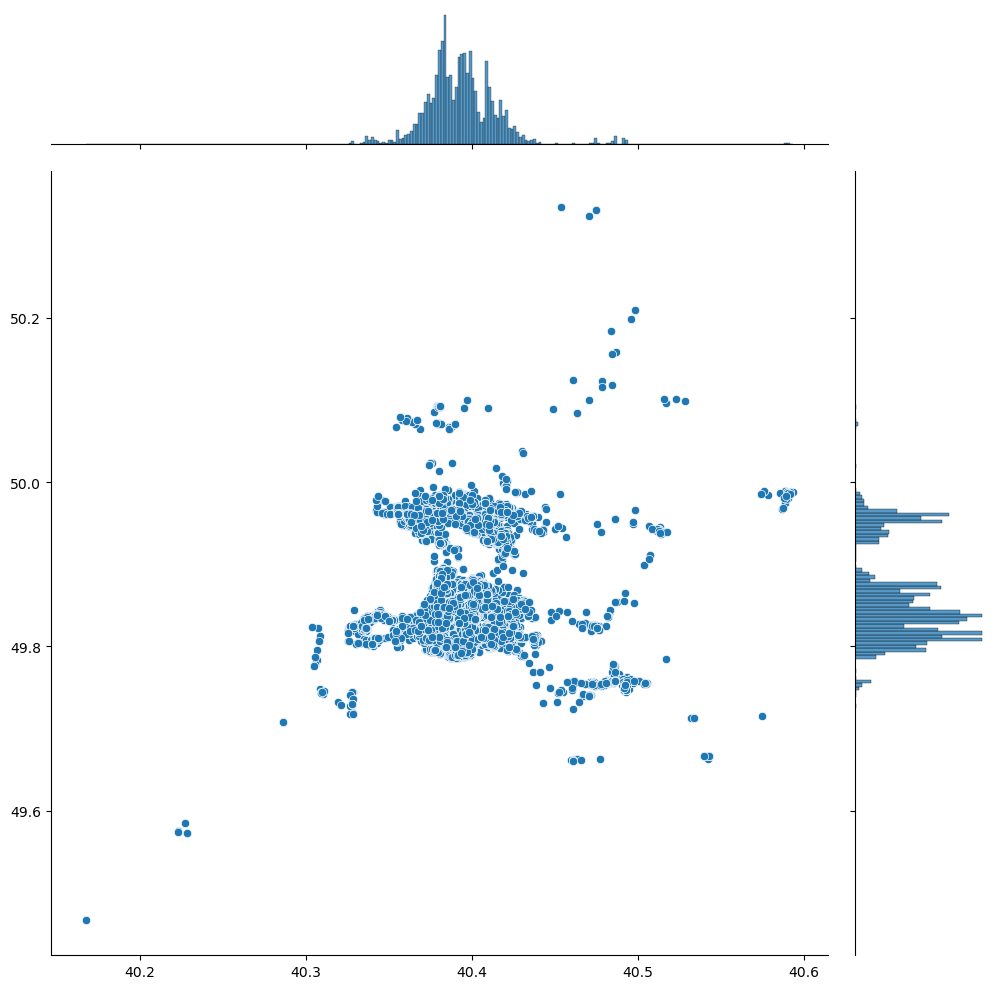

TypeError: 'module' object is not callable

In [3]:


plt.figure(figsize=(10,10))
sns.jointplot(x=data.latitude.values, y=data.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
plt1 = plt()
sns.despine

In [3]:
def detect_outliers_zscore(copy, label):
    thres = 4
    data = copy[label]
    mean = np.mean(data)
    std = np.std(data)
    for i in range(0, len(data)):
        if i in data.index:
            element = data[i]
            z_score = (element-mean)/std
            if (np.abs(z_score) > thres):
                copy.at[i, label] = mean
detect_outliers_zscore(data, 'latitude')
detect_outliers_zscore(train, 'latitude')

In [4]:
def detect_outliers_border(copy, label):
    thres = 3
    data = copy[label]
    mean = np.mean(data)
    std = np.std(data)
    for i in range(0, len(data)):
        if i in data.index:
            element = data[i]
            z_score = (element-mean)/std
            if (z_score > thres):
                copy.at[i, label] = thres * std + mean
            elif z_score < -thres:
                copy.at[i, label] = -thres * std - mean
#detect_outliers_border(data, '')

In [5]:
'''def detect_outliers_zscore(data, label):
    outliers = []
    thres = 4
    data = data[label]
    mean = np.mean(data)
    std = np.std(data)
    for i in range(0, len(data)):
        element = data[i]
        z_score = (element-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
#sample_outliers = detect_outliers_zscore(data, 'longitude')
sample_outliers = detect_outliers_zscore(data, 'latitude')
sample_outliers += detect_outliers_zscore(data, 'rooms')
data = data.drop(sample_outliers)'''

"def detect_outliers_zscore(data, label):\n    outliers = []\n    thres = 4\n    data = data[label]\n    mean = np.mean(data)\n    std = np.std(data)\n    for i in range(0, len(data)):\n        element = data[i]\n        z_score = (element-mean)/std\n        if (np.abs(z_score) > thres):\n            outliers.append(i)\n    return outliers# Driver code\n#sample_outliers = detect_outliers_zscore(data, 'longitude')\nsample_outliers = detect_outliers_zscore(data, 'latitude')\nsample_outliers += detect_outliers_zscore(data, 'rooms')\ndata = data.drop(sample_outliers)"

In [6]:
to_drop = []
for key in data.keys():
    if data[key].dtype == 'int64':
        true = 0
        false = 0
        for element in data[key]:
            if element == 1:
                true += 1
            elif element == 0:
                false += 1
        if true + false == len(data[key]):
            if true * 21 < false:
                #print(true, false, true * 25)
                to_drop.append(key)
print(len(to_drop))

columns = data.columns.tolist()
columns = [c for c in columns if c not in to_drop]
data = data[columns]

170


In [7]:
to_drop = []
for key in train.keys():
    if train[key].dtype == 'int64':
        true = 0
        false = 0
        for element in train[key]:
            if element == 1:
                true += 1
            elif element == 0:
                false += 1
        if true + false == len(train[key]):
            if true * 21 < false:
                #print(true, false, true * 25)
                to_drop.append(key)
print(len(to_drop))

columns = train.columns.tolist()
columns = [c for c in columns if c not in to_drop]
train = train[columns]

170


In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

xgbr = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=10, max_depth=4, n_estimators=2100, max_leaf_nodes= 50, random_state=0, max_features=15)

target='price'
columns = train.columns.tolist()
columns = [c for c in columns if c not in ['price']]
xgbr.fit(train[columns], train[target])
predictions = xgbr.predict(test[columns])

lin_mse = mean_squared_error(predictions, test[target], squared=False)
print("Computed error:", lin_mse)

Computed error: 82315.41540023757


In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

xgbr = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=10, max_depth=4, n_estimators=2100, max_leaf_nodes= 50, random_state=0, max_features=15)

target='price'
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['price']]

train = data.sample(frac=0.7, random_state=3)
test = data.loc[~data.index.isin(train.index)]

xgbr.fit(train[columns], train[target])
predictions = xgbr.predict(test[columns])

lin_mse = mean_squared_error(predictions, test[target], squared=False)
print("Computed error:", lin_mse)

Computed error: 81900.2283290081


In [10]:
#data.to_csv('engineered_test.csv', index=False)

In [8]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
import mpl_toolkits
# import pandas for data wrangling
import pandas as pd


# import numpy for Scientific computations
import numpy as np


# import machine learning libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

xgbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators = 900, max_leaf_nodes= 50, min_samples_split=25, random_state=0, subsample=0.8, max_features=17, max_depth=50)

target = 'price'
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['price']]
xgbr.fit(data[columns], data[target])

predictions = xgbr.predict(test[columns])

#lin_mse = mean_squared_error(predictions, test[target], squared=False)
#print("Computed error:", lin_mse)
predictions = pd.DataFrame(predictions)
predictions.to_csv('final_result.csv', header=['price'])

In [9]:
data.to_csv('engineered_data.csv', index=False)